___
#### 정확성 II
```python
관계적 이상점 (Relational Outlier)
    : 두 변수의 관계를 고려했을 때 이상한 데이터.
```
___

In [13]:
import pandas as pd
import matplotlib as plt

In [3]:
df = pd.read_csv('../data/exam_outlier.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<Axes: xlabel='reading score', ylabel='writing score'>

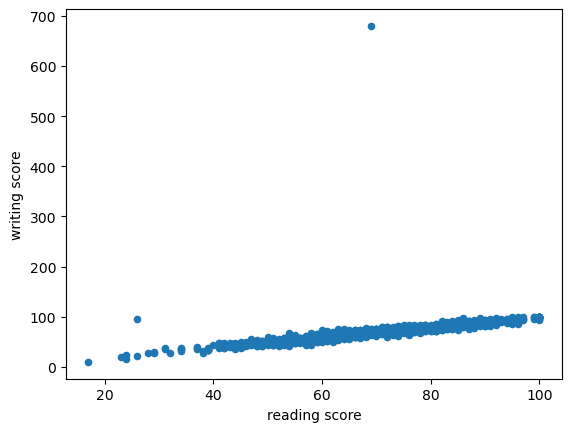

In [4]:
df.plot(kind='scatter', x='reading score', y='writing score')

이상점 삭제

In [6]:
df['writing score'] > 100  # Pandas Series

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: writing score, Length: 1000, dtype: bool

In [7]:
# 시험 점수가 100점을 초과한 행, 즉 이상치 레코드를 인덱싱.
df[df['writing score'] > 100]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
51,male,group E,associate's degree,free/reduced,completed,77,69,680


In [8]:
# 인덱스 번호로 인덱싱해서 삭제.
df.drop(51, inplace=True)

<Axes: xlabel='reading score', ylabel='writing score'>

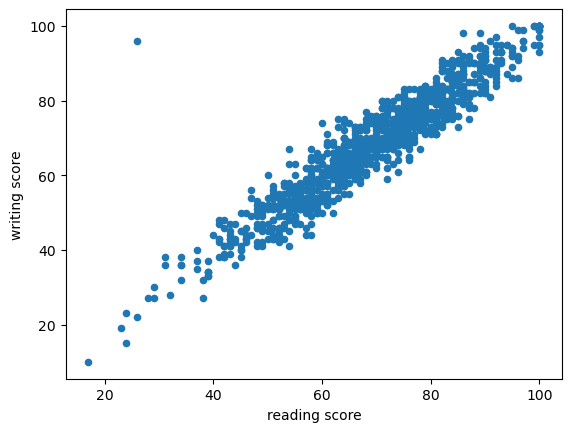

In [9]:
# 다시 scatter plot 그리기
df.plot(kind='scatter', x='reading score', y='writing score')

In [16]:
condition = (df['writing score'] > 90) & (df['reading score'] < 40)
df[condition]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
373,female,group D,some college,standard,completed,82,26,96


In [17]:
df.drop(373, inplace=True)

<Axes: xlabel='reading score', ylabel='writing score'>

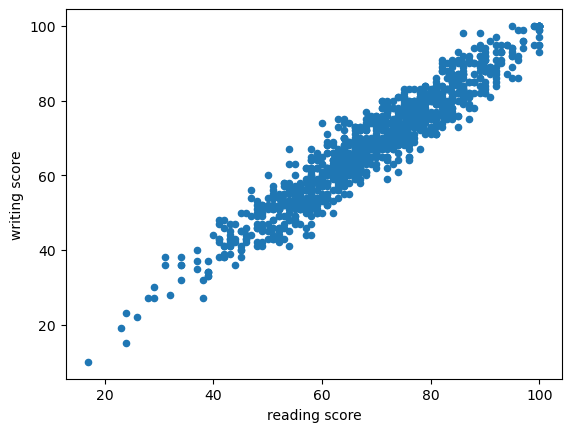

In [18]:
df.plot(kind='scatter', x='reading score', y='writing score')